# Exploring The MURA Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
from glob import glob

## Looking into the CSV files provided

In [2]:
# Reading in the csv for the training image paths
train_imgs = pd.read_csv('MURA-v1.1/train_image_paths.csv')
train_imgs.head()

# The first row of the csv is showing up as the column name

,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [3]:
# Getting the first pathway
train_imgs.columns

Index(['MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png'], dtype='object')

In [4]:
# Shifting the first row into the data frame and adding a column name
train_imgs.loc[-1] = ['MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png']
train_imgs.index = train_imgs.index + 1
train_imgs.columns = ['path']
train_imgs = train_imgs.sort_index()
train_imgs.head()

,path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [5]:
# Saving the dataframe as a csv to refer back to it
train_imgs.to_csv(r'train_image_path_fixed.csv', sep=' ', encoding='utf-8', header='true', index=False)
# The rest of the csv files seem to have the same issue so I just edited the csv files

In [6]:
# Fixed csv file to dataframe
train_imgs_f = pd.read_csv('train_image_path_fixed.csv')
train_imgs_f.head()

,path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [7]:
# Number of images in the train set
train_imgs_f.shape

(36808, 1)

In [8]:
# Importing the other files to dataframes
train_labels = pd.read_csv('MURA-v1.1/train_labeled_studies.csv')
valid_imgs = pd.read_csv('MURA-v1.1/valid_image_paths.csv')
valid_labels = pd.read_csv('MURA-v1.1/valid_labeled_studies.csv')

In [9]:
valid_imgs.shape

(3197, 1)

In [10]:
# Looking at the training labels
print(train_labels.shape)
display(train_labels.head())

(13457, 2)


,path,class
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [11]:
# Comparing the number of positive and negative studies 
train_labels['class'].value_counts()

0    8280
1    5177
Name: class, dtype: int64

In [12]:
# Pulling the image paths
train_imgs_f.values[0][0]

'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png'

## Reorganizing The CSVs + Feature Engineering

In [13]:
# Adding columns for the anatomy, patient, and the study number
class_names = {1:'positive',0:'negative'}

train_imgs_f['anatomy'] = train_imgs_f['path'].apply(lambda x: str(x.split('/')[2])[3:])
train_imgs_f['patient'] = train_imgs_f['path'].apply(lambda x: str(x.split('/')[3]))
train_imgs_f['study_num'] = train_imgs_f['path'].apply(lambda x: str(x.split('/')[4])[:6])
train_imgs_f['class_label'] = train_imgs_f['path'].apply(lambda x: str(x.split('/')[4])[7:])
train_imgs_f['class'] = train_imgs_f['class_label'].apply(lambda x: 0 if x =='negative' else 1 )

train_imgs_f.head()

,path,anatomy,patient,study_num,class_label,class
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER,patient00001,study1,positive,1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER,patient00001,study1,positive,1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER,patient00001,study1,positive,1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,SHOULDER,patient00002,study1,positive,1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,SHOULDER,patient00002,study1,positive,1


In [14]:
# Adding columns for the anatomy, patient, and the study number
train_labels['anatomy'] = train_labels['path'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['patient'] = train_labels['path'].apply(lambda x: str(x.split('/')[3]))
train_labels['study_num'] = train_labels['path'].apply(lambda x: str(x.split('/')[4])[:6])
train_labels['class_label'] = train_labels['class'].apply(lambda x: 0 if x =='negative' else 1 )

train_labels.head()

,path,class,anatomy,patient,study_num,class_label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,SHOULDER,patient00001,study1,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,SHOULDER,patient00002,study1,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1,SHOULDER,patient00003,study1,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1,SHOULDER,patient00004,study1,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1,SHOULDER,patient00005,study1,1


In [15]:
# Adding columns for the anatomy, patient, and the study number
valid_imgs['anatomy'] = valid_imgs['path'].apply(lambda x: str(x.split('/')[2])[3:])
valid_imgs['patient'] = valid_imgs['path'].apply(lambda x: str(x.split('/')[3]))
valid_imgs['study_num'] = valid_imgs['path'].apply(lambda x: str(x.split('/')[4])[:6])
valid_imgs['class_label'] = valid_imgs['path'].apply(lambda x: str(x.split('/')[4])[7:])
valid_imgs['class'] = valid_imgs['class_label'].apply(lambda x: 0 if x =='negative' else 1 )

valid_imgs.head()

,path,anatomy,patient,study_num,class_label,class
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,WRIST,patient11185,study1,positive,1
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,WRIST,patient11185,study1,positive,1
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,WRIST,patient11185,study1,positive,1
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,WRIST,patient11185,study1,positive,1
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,WRIST,patient11186,study1,positive,1


In [16]:
# Adding columns for the anatomy, patient, and the study number
valid_labels['class_label'] = valid_labels['path'].apply(lambda x: str(x.split('/')[4])[7:])
valid_labels['anatomy'] = valid_labels['path'].apply(lambda x: str(x.split('/')[2])[3:])
valid_labels['patient'] = valid_labels['path'].apply(lambda x: str(x.split('/')[3]))
valid_labels['study_num'] = valid_labels['path'].apply(lambda x: str(x.split('/')[4])[:6])

valid_labels.head()

,path,class,class_label,anatomy,patient,study_num
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,positive,WRIST,patient11185,study1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,positive,WRIST,patient11186,study1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1,positive,WRIST,patient11186,study2
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1,positive,WRIST,patient11186,study3
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1,positive,WRIST,patient11187,study1


In [17]:
#Saving for future use
train_imgs_f.to_csv('MURA-v1.1/train_image_df.csv', index = None)

train_labels.to_csv('MURA-v1.1/train_labels_df.csv', index = None)

valid_imgs.to_csv('MURA-v1.1/valid_imgs_df.csv', index = None)

valid_labels.to_csv('MURA-v1.1/valid_labels_df.csv', index = None)


## Visualizing some of the Data

In [18]:
positive_imgs = train_imgs_f[train_imgs_f['class']==1]
negative_imgs = train_imgs_f[train_imgs_f['class']==0]

In [19]:
negative_imgs.head()

,path,anatomy,patient,study_num,class_label,class
19,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,SHOULDER,patient00007,study2,negative,0
20,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,SHOULDER,patient00007,study2,negative,0
21,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,SHOULDER,patient00007,study2,negative,0
22,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,SHOULDER,patient00007,study2,negative,0
155,MURA-v1.1/train/XR_SHOULDER/patient00051/study...,SHOULDER,patient00051,study2,negative,0


In [20]:
positive_imgs.head()

,path,anatomy,patient,study_num,class_label,class
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER,patient00001,study1,positive,1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER,patient00001,study1,positive,1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER,patient00001,study1,positive,1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,SHOULDER,patient00002,study1,positive,1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,SHOULDER,patient00002,study1,positive,1


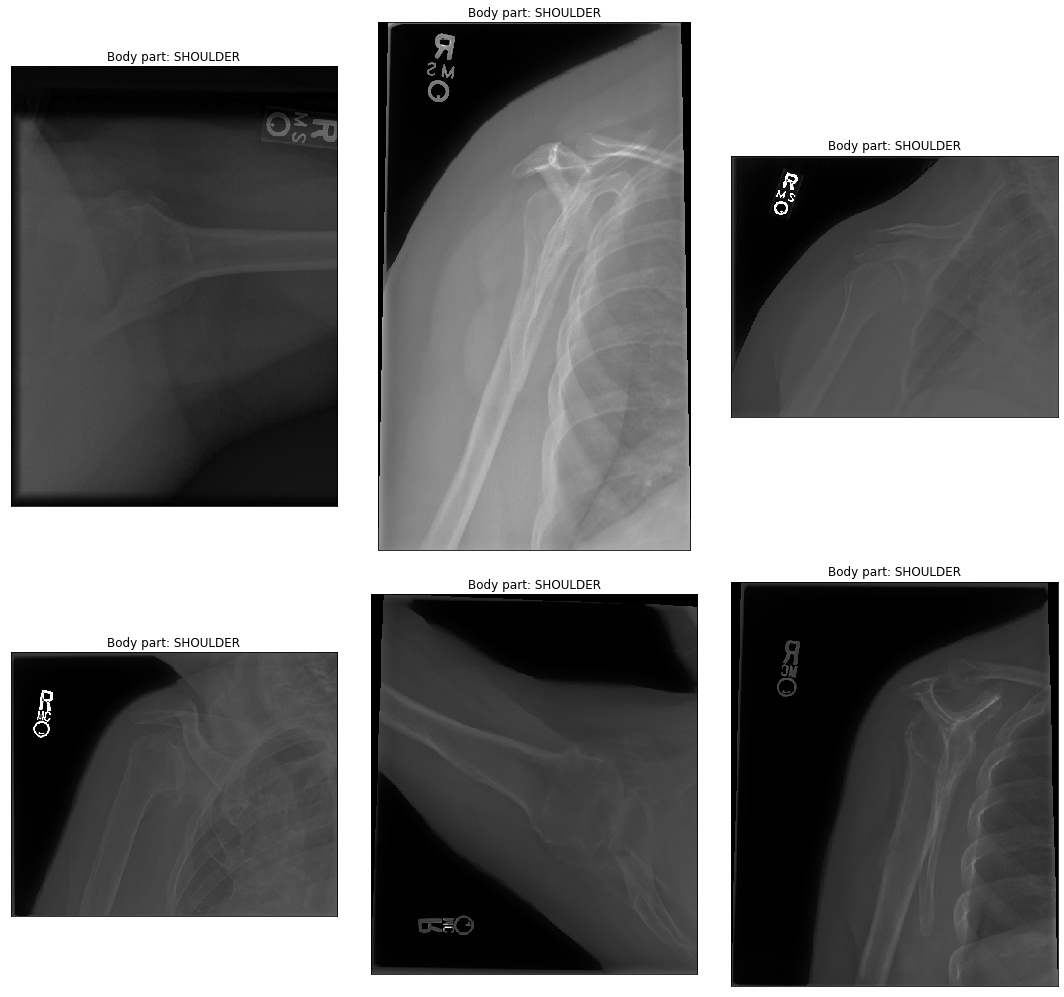

In [35]:
# read some of positive samples
plt.figure(figsize=(15,15))

for i in range(6):
  path = positive_imgs.iloc[i,0]
  anatomy = positive_imgs.iloc[i,1]
  img = cv2.imread(path)
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  img = img[:,:,::]
  plt.imshow(img)
  plt.title("Body part: {}".format(anatomy))
  plt.xticks([])
  plt.yticks([])

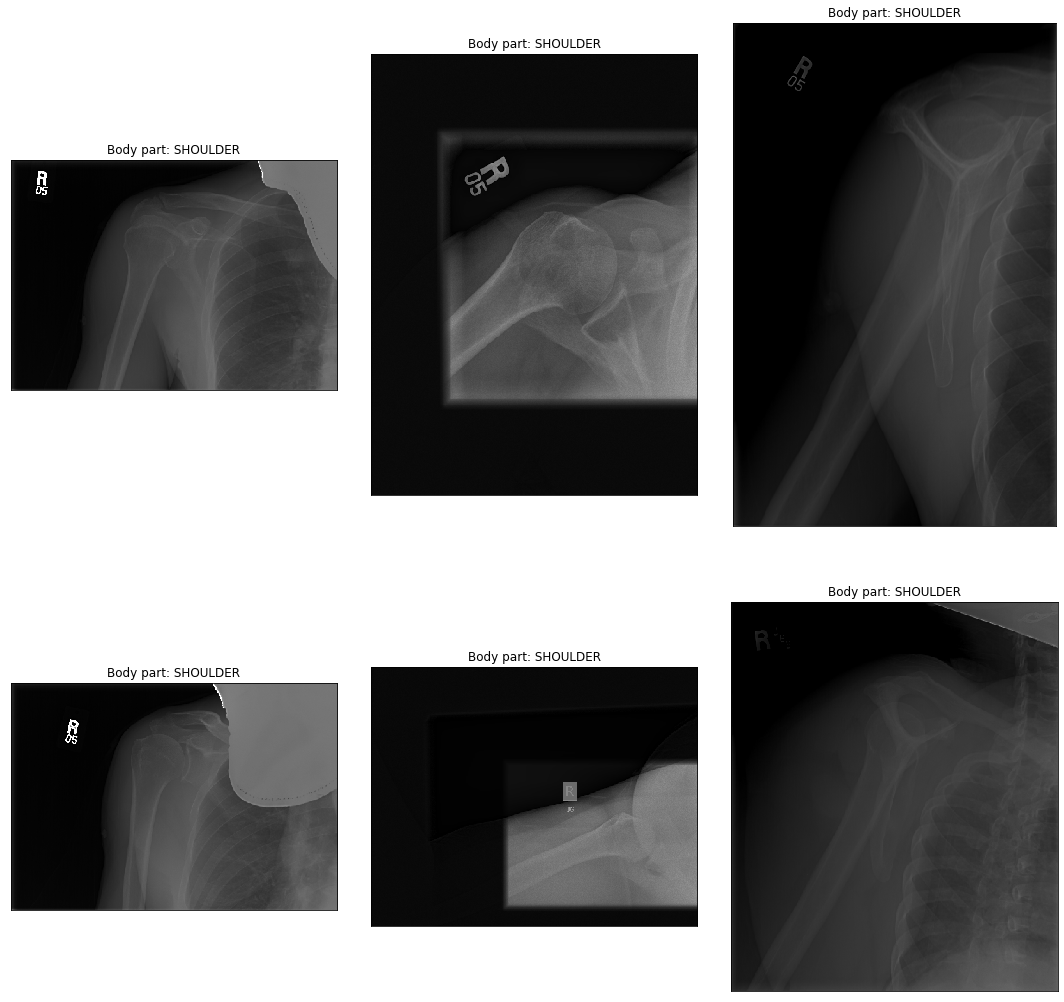

In [36]:
# read some of negative samples
plt.figure(figsize=(15,15))

for i in range(6):
  path = negative_imgs.iloc[i,0]
  anatomy = negative_imgs.iloc[i,1]
  img = cv2.imread(path)
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  img = img[:,:,::]
  plt.imshow(img)
  plt.title("Body part: {}".format(anatomy))
  plt.xticks([])
  plt.yticks([])

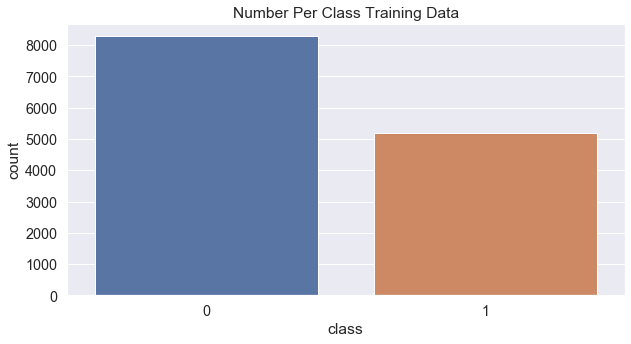

In [28]:
# Plotting out the number per classes in the training data
plt.figure(figsize = (10,5))
sns.set(font_scale = 1.3)
ax = sns.countplot(x = 'class', data = train_labels)
plt.title('Number Per Class Training Data')
plt.show()

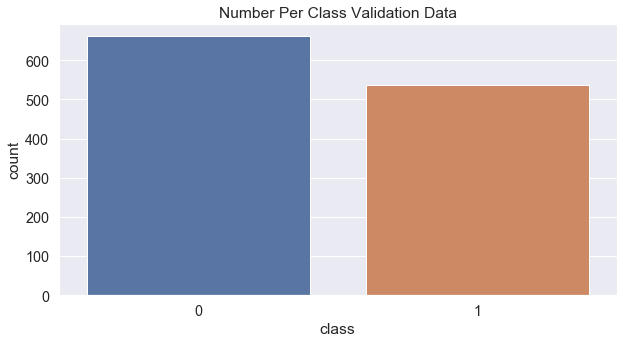

In [29]:
# Plotting out the number per classes in the validation data
plt.figure(figsize = (10,5))
sns.set(font_scale = 1.3)
ax = sns.countplot(x = 'class', data = valid_labels)
plt.title('Number Per Class Validation Data')
plt.show()

Text(0.5, 1.0, 'Class Split per Anatomy')

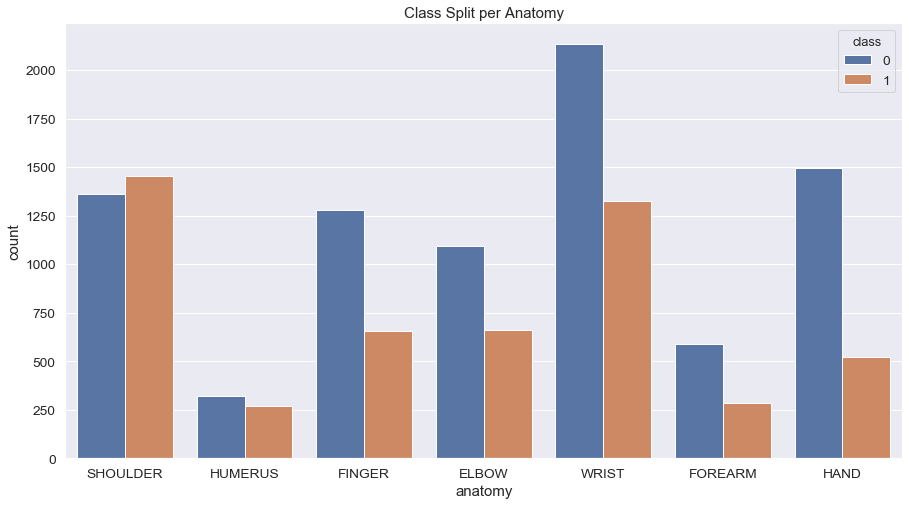

In [30]:
# Plotting out the classes for the different body parts in the training data
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.25)
ax = sns.countplot(x = 'anatomy', hue = 'class', data = train_labels)
plt.title('Class Split per Anatomy')

Text(0.5, 1.0, 'Class Split per Anatomy')

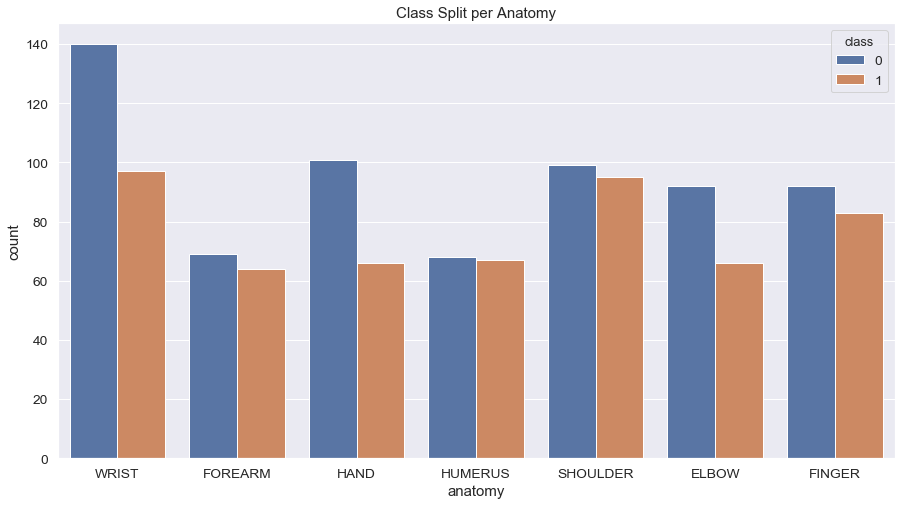

In [31]:
# Plotting out the classes for the different body parts in the valdation data
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.25)
ax = sns.countplot(x = 'anatomy', hue = 'class', data = valid_labels)
plt.title('Class Split per Anatomy')

In [32]:
# Number of patients
train_labels['patient'].nunique()

11184

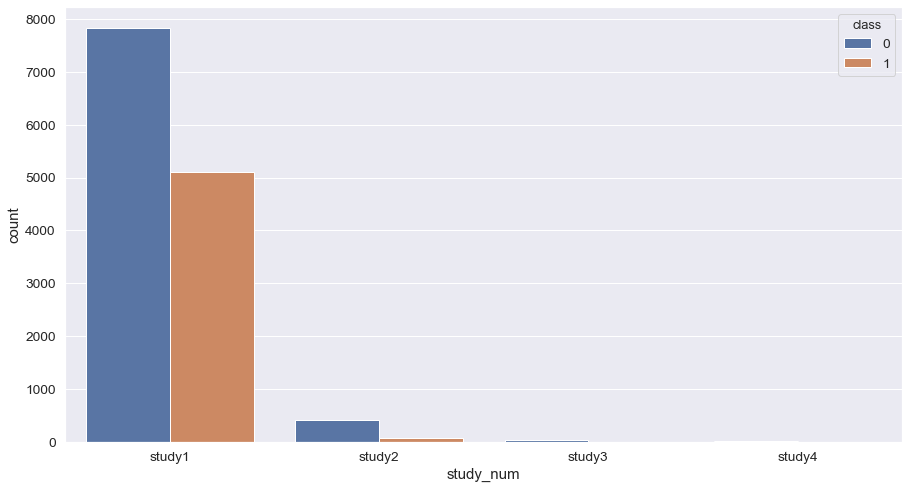

In [33]:
# Plotting out the classes for the different studies in the training data
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.25)
ax=sns.countplot(x = 'study_num', hue = 'class', data = train_labels)

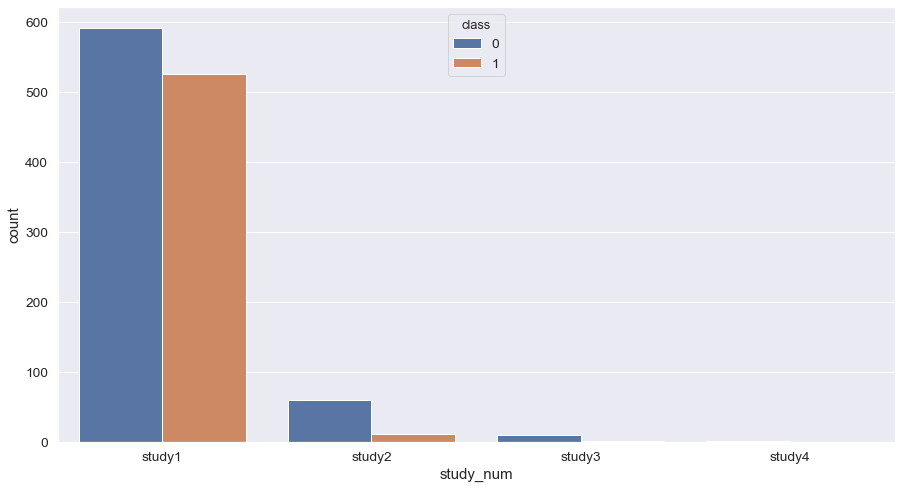

In [34]:
# Plotting out the classes for the different studies in the training data
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.25)
ax=sns.countplot(x = 'study_num', hue = 'class', data = valid_labels)

## Seperating The Data

In [54]:
# Getting the different body parts again
train_labels['anatomy'].unique()

array(['SHOULDER', 'HUMERUS', 'FINGER', 'ELBOW', 'WRIST', 'FOREARM',
       'HAND'], dtype=object)

In [56]:
catagories = ('SHOULDER', 'HUMERUS', 'FINGER', 'ELBOW', 'WRIST', 'FOREARM', 'HAND')

In [100]:
# Making a dataframe for only shoulder images
shoulders = train_imgs_f.loc[train_imgs_f['anatomy']=='SHOULDER']
shoulders.head()

,path,anatomy,patient,study_num,class_label,class
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER,patient00001,study1,positive,1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER,patient00001,study1,positive,1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER,patient00001,study1,positive,1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,SHOULDER,patient00002,study1,positive,1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,SHOULDER,patient00002,study1,positive,1


In [71]:
# Making dataframes for the different body parts for the training data
humerus = train_imgs_f.loc[train_imgs_f['anatomy']=='HUMERUS']

finger = train_imgs_f.loc[train_imgs_f['anatomy']=='FINGER']

elbow = train_imgs_f.loc[train_imgs_f['anatomy']=='ELBOW']

wrist = train_imgs_f.loc[train_imgs_f['anatomy']=='WRIST']

forearm = train_imgs_f.loc[train_imgs_f['anatomy']=='FOREARM']

hand = train_imgs_f.loc[train_imgs_f['anatomy']=='HAND']

In [101]:
# Saving the dataframe for later use
shoulders.to_csv(r'train_shoulder.csv', index=False)

In [106]:
# Saving the dataframes for later use
humerus.to_csv(r'train_humerus.csv', index=False)
finger.to_csv(r'train_finger.csv', index=False)
elbow.to_csv(r'train_elbow.csv', index=False)
wrist.to_csv(r'train_wrist.csv', index=False)
forearm.to_csv(r'train_forearm.csv', index=False)
hand.to_csv(r'train_hand.csv', index=False)

In [97]:
# Making dataframes for the different body parts for the test data
shoulders_test = valid_imgs.loc[valid_imgs['anatomy']=='SHOULDER']

humerus_test = valid_imgs.loc[valid_imgs['anatomy']=='HUMERUS']

finger_test = valid_imgs.loc[valid_imgs['anatomy']=='FINGER']

elbow_test = valid_imgs.loc[valid_imgs['anatomy']=='ELBOW']

wrist_test = valid_imgs.loc[valid_imgs['anatomy']=='WRIST']

forearm_test = valid_imgs.loc[valid_imgs['anatomy']=='FOREARM']

hand_test = valid_imgs.loc[valid_imgs['anatomy']=='HAND']

In [99]:
# Saving the dataframes for later use
shoulders_test.to_csv(r'test_shoulder.csv', index=False)
humerus_test.to_csv(r'test_humerus.csv', index=False)
finger_test.to_csv(r'test_finger.csv', index=False)
elbow_test.to_csv(r'test_elbow.csv', index=False)
wrist_test.to_csv(r'test_wrist.csv', index=False)
forearm_test.to_csv(r'test_forearm.csv', index=False)
hand_test.to_csv(r'test_hand.csv', index=False)